#  Research Methods for Climate Sciences
### Group 8 : Cape Town

- Yves HERI KIMBELE
- Athanase Hafashimana
- Donald Yombi
- Geraldine Banda
- Bonaventure Kagarura
- Ferguson Chalumba


## Time series analysis part 1(Auto-correlation and Cross-correlation)

## Climate Data
### Data extraction and  cleaning data


#### Libraires

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.graphics.tsaplots import *
from sklearn.preprocessing import scale
from numpy import polyfit 
from scipy import *
import matplotlib.dates as mdates
from scipy import signal
#pip install git+https://github.com/tweepy/tweepy.git
#pip install git+https://github.com/aaren/wavelets
#pip install kPyWavelet
# import kPyWavelet as wavelet

### Data

In [4]:
data=pd.read_csv('Cape_Town_2_Group8.csv')
data

,PRED,PETD,CLDD,DTRD,TMPD,TMND,TMXD,VAPD,WETD
0,7.0,5.4,30.6,10.6,19.8,14.5,25.1,15.8,2.40
1,10.6,5.3,27.3,11.5,20.5,14.8,26.3,16.5,3.14
2,37.7,4.0,34.2,10.5,18.3,13.1,23.6,14.7,5.64
3,42.1,2.8,39.4,9.8,16.3,11.4,21.2,13.3,7.58
4,114.0,1.8,48.6,8.0,13.8,9.8,17.8,12.1,12.66
...,...,...,...,...,...,...,...,...,...
607,44.2,2.7,41.1,10.2,13.8,8.7,18.9,10.4,9.69
608,30.8,3.3,42.4,9.7,14.9,10.1,19.8,11.3,7.52
609,34.1,3.8,43.7,9.6,15.6,10.8,20.4,12.4,10.15
610,33.2,5.0,36.4,9.9,17.9,13.0,22.9,13.6,6.27


In [5]:
dti =pd.date_range("1960-01-01", periods=12*51, freq="M")

In [6]:
data["Date"]=dti
data

,PRED,PETD,CLDD,DTRD,TMPD,TMND,TMXD,VAPD,WETD,Date
0,7.0,5.4,30.6,10.6,19.8,14.5,25.1,15.8,2.40,1960-01-31
1,10.6,5.3,27.3,11.5,20.5,14.8,26.3,16.5,3.14,1960-02-29
2,37.7,4.0,34.2,10.5,18.3,13.1,23.6,14.7,5.64,1960-03-31
3,42.1,2.8,39.4,9.8,16.3,11.4,21.2,13.3,7.58,1960-04-30
4,114.0,1.8,48.6,8.0,13.8,9.8,17.8,12.1,12.66,1960-05-31
...,...,...,...,...,...,...,...,...,...,...
607,44.2,2.7,41.1,10.2,13.8,8.7,18.9,10.4,9.69,2010-08-31
608,30.8,3.3,42.4,9.7,14.9,10.1,19.8,11.3,7.52,2010-09-30
609,34.1,3.8,43.7,9.6,15.6,10.8,20.4,12.4,10.15,2010-10-31
610,33.2,5.0,36.4,9.9,17.9,13.0,22.9,13.6,6.27,2010-11-30


### Time series plot for precipitation

### Plot the time series

[Text(0.5, 1.0, 'Precipitation')]

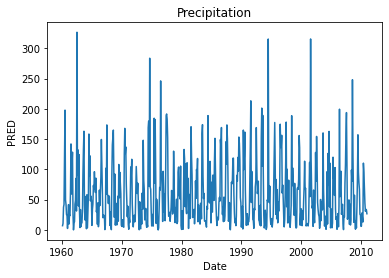

In [7]:
#plt.figure(figsize=(10, 10))
sns.lineplot(x = 'Date', y ='PRED',data = data).set(title='Precipitation')

#### Checking for trend and Detrending

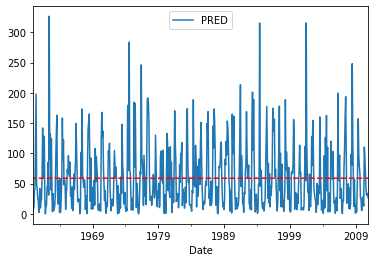

In [8]:
x=mdates.date2num(data["Date"])
y=data["PRED"]
z=np.polyfit(x,y,1)
p=np.poly1d(z)
data.plot("Date", "PRED")
plt.plot(x, p(x), "r--")

In [9]:
p(x)

array([59.10788559, 59.10707257, 59.10620349, 59.10536244, 59.10449335,
       59.1036523 , 59.10278321, 59.10191413, 59.10107308, 59.10020399,
       59.09936294, 59.09849386, 59.09762477, 59.09683979, 59.0959707 ,
       59.09512965, 59.09426057, 59.09341952, 59.09255043, 59.09168135,
       59.0908403 , 59.08997121, 59.08913016, 59.08826107, 59.08739199,
       59.08660701, 59.08573792, 59.08489687, 59.08402779, 59.08318674,
       59.08231765, 59.08144856, 59.08060751, 59.07973843, 59.07889738,
       59.07802829, 59.07715921, 59.07637423, 59.07550514, 59.07466409,
       59.07379501, 59.07295395, 59.07208487, 59.07121578, 59.07037473,
       59.06950565, 59.0686646 , 59.06779551, 59.06692643, 59.06611341,
       59.06524432, 59.06440327, 59.06353419, 59.06269314, 59.06182405,
       59.06095497, 59.06011392, 59.05924483, 59.05840378, 59.05753469,
       59.05666561, 59.05588063, 59.05501154, 59.05417049, 59.05330141,
       59.05246036, 59.05159127, 59.05072219, 59.04988114, 59.04

### Time series plot for precipitation

[Text(0.5, 1.0, 'Temperature')]

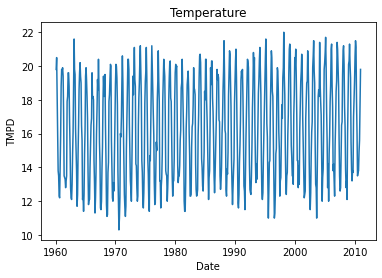

In [10]:
#plt.figure(figsize=(15, 10))
sns.lineplot(x = 'Date', y ='TMPD',data = data).set(title='Temperature')

#### Checking for trend and Detrending

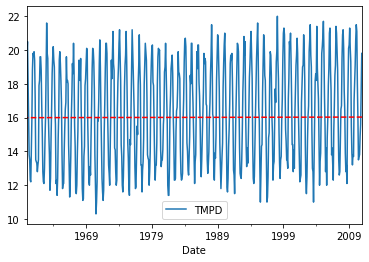

In [11]:
x=mdates.date2num(data["Date"])
y=data["TMPD"]
z=np.polyfit(x,y,1)
p=np.poly1d(z)
data.plot("Date", "TMPD")
plt.plot(x, p(x), "r--")

### Auto-correlation 

In [12]:
T=data['TMPD']

In [13]:
P_scaled=scale(data['PRED'].values) 
T_scaled=scale(data['TMPD'].values)

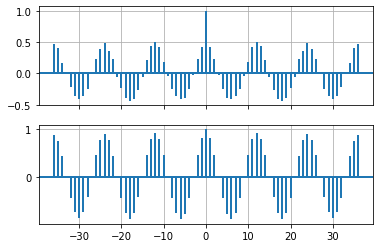

In [14]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)


# # x, y = np.random.randn(2, 100)
fig, [ax2,ax3] = plt.subplots(2, 1, sharex=True)
# ax1.xcorr(P_scaled, T_scaled, usevlines=True, maxlags=27, normed=True, lw=2)
# ax1.grid(True)

ax2.acorr(P_scaled, usevlines=True, normed=True, maxlags=36, lw=2)
ax2.grid(True)

ax3.acorr(T_scaled, usevlines=True, normed=True, maxlags=36, lw=2)
ax3.grid(True)

plt.show()

### Cross-correlation

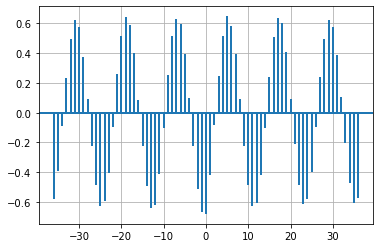

In [15]:
# fig, [ax1] = plt.subplots(1, 1, sharex=True)
plt.xcorr(P_scaled, T_scaled, usevlines=True, maxlags=36, normed=True, lw=2)
plt.grid(True)

## Time series analysis part 2(Spectral analysis and Wavelet analysis)

### spectral analysis for precipitation

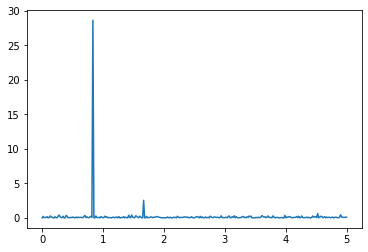

In [16]:
f, Pxx_den = signal.periodogram(P_scaled, 10)
plt.plot(f,Pxx_den)


### spectral analysis for temperature

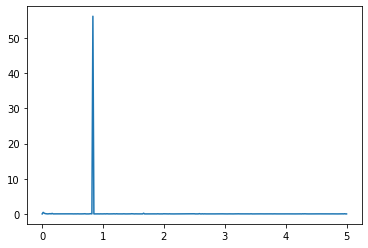

In [17]:
 f, Pxx_den = signal.periodogram(T_scaled, 10)
plt.plot(f,Pxx_den)

### wavelet analysis for precipitation 

In [18]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [19]:
# url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = P_scaled  #numpy.genfromtxt(url, skip_header=19)
# dat = T_scaled 
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1960.0
dt = 1/12  # In years

In [20]:
dat

array([-9.66606884e-01, -8.99490757e-01, -3.94255463e-01, -3.12224640e-01,
        1.02823358e+00,  2.59241222e+00, -1.72399374e-01, -3.15953314e-01,
       -6.21704562e-01, -6.62719973e-01, -1.05236638e+00, -6.51533952e-01,
       -3.17817651e-01, -9.16269789e-01, -6.40347931e-01, -6.55262626e-01,
        1.03522484e-01,  1.55024790e+00,  8.44130309e-03,  9.12644689e-01,
        1.29669809e+00, -6.06789867e-01, -1.09524613e+00, -8.93897746e-01,
       -8.39831977e-01, -3.02902956e-01, -1.91042743e-01,  4.89440218e-01,
       -5.15437360e-01,  4.98994944e+00,  5.82657062e-01,  1.36754289e+00,
       -3.60697399e-01,  1.22398895e+00, -4.96793991e-01, -1.02440133e+00,
       -4.70693275e-01, -9.98300611e-01, -8.92033409e-01, -8.77118714e-01,
       -5.32216392e-01,  6.12486452e-01,  1.38432192e+00,  1.94175865e+00,
       -3.42054030e-01, -7.91359218e-01, -6.79965089e-02, -4.57642917e-01,
       -1.06168807e+00, -1.57950763e-02, -1.02999434e+00, -5.62045782e-01,
       -1.20664026e-02,  

In [21]:
N = dat.size
t = numpy.arange(0, N) * dt + t0

In [22]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [23]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [24]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [25]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [26]:
power /= scales[:, None]

In [27]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [28]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [29]:
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

C:\Users\Client\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


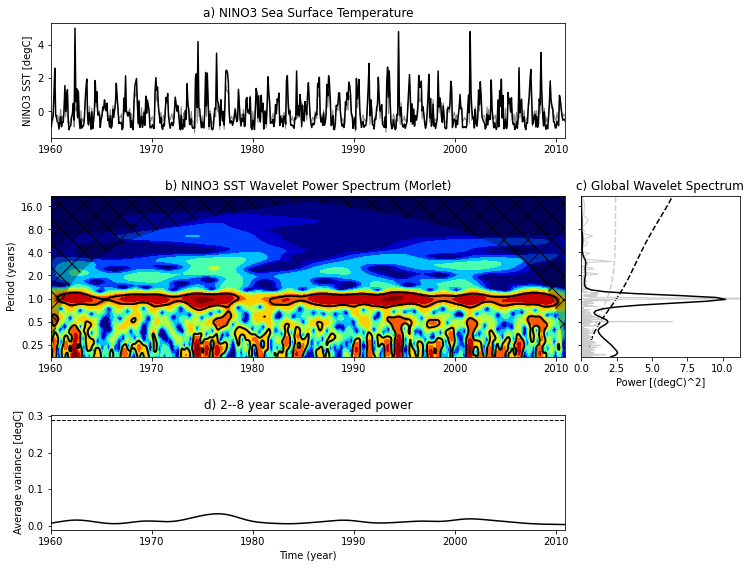

In [30]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()